In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error

# Exploratory Data Analysis

In [2]:
data = pd.read_csv("data.csv")
data.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [4]:
data['regio2']

0                        Dortmund
1               Rhein_Pfalz_Kreis
2                         Dresden
3             Mittelsachsen_Kreis
4                          Bremen
                   ...           
268845    Weilheim_Schongau_Kreis
268846           Bergstraße_Kreis
268847     Limburg_Weilburg_Kreis
268848                       Köln
268849          Frankfurt_am_Main
Name: regio2, Length: 268850, dtype: object

In [5]:
data['regio2'].isna().sum()

0

In [6]:
# Since our focus is on Köln, lets use the column 'regio2' to obtain only data corresponding to the city of  Köln

colo = data.loc[data['regio2'] == 'Köln']
colo.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
253,Nordrhein_Westfalen,NaN,NaN,ONE_YEAR_FREE,NaN,False,False,10,4.91,40.0,...,Köln,Altstadt_&_Neustadt_Nord,gepflegtes Mehrfamilienhaus,"zeitlose Möblierung, Laminatboden, separate Ei...",NaN,NaN,NaN,NaN,NaN,Feb20
336,Nordrhein_Westfalen,200.0,floor_heating,NaN,NaN,True,True,11,4.42,NaN,...,Köln,Dellbrück,Zum 01.11.2019 können Sie diese Maisonette-Woh...,"Bodentiefe Fenster, Fussbodenheizung, Fensterb...",NaN,NaN,NaN,NaN,NaN,Oct19
352,Nordrhein_Westfalen,110.0,central_heating,ONE_YEAR_FREE,NaN,False,False,4,4.55,10.0,...,Köln,Sülz,Herzlich Willkommen in Ihrem neuen Zuhause.\n\...,NaN,NaN,NaN,NaN,NaN,NaN,Oct19


In [7]:
colo.shape

(2709, 49)

In [8]:
data.shape

(268850, 49)

In [9]:
# Percentage of missing values in the data 'Colo'

((colo.isna().sum()/len(colo)) * 100).sort_values(ascending = False)

telekomHybridUploadSpeed    84.163898
electricityBasePrice        82.539683
electricityKwhPrice         82.539683
heatingCosts                81.432263
energyEfficiencyClass       76.190476
noParkSpaces                65.485419
lastRefurbish               63.122924
thermalChar                 50.424511
petsAllowed                 39.608712
interiorQual                35.252861
houseNumber                 31.081580
streetPlain                 31.081580
yearConstructedRange        27.205611
yearConstructed             27.205611
numberOfFloors              22.997416
firingTypes                 22.406792
condition                   20.745663
facilities                  19.933555
telekomUploadSpeed          17.275748
telekomTvOffer              17.275748
totalRent                   15.946844
floor                       15.393134
heatingType                 14.581026
typeOfFlat                   8.822444
serviceCharge                4.798819
description                  1.624216
pricetrend  

*As seen above, some important features  have high percentage of missong values, we have to conclude on dropping these columns or not*

In [10]:
#Some unrequired Columns to drop :

cologne_copy = colo.copy()

col1 = colo.drop(columns= ['baseRent', 'regio1', 'regio2', 'regio3', 'houseNumber',
                           'geo_bln', 'description', 'noRoomsRange', 'yearConstructedRange',
                           'geo_krs', 'baseRentRange', 'scoutId', 'facilities',])

# Some unrequired Columns to drop :

cologne_copy = colo.copy()

col1 = colo.drop(columns= ['baseRent', 'regio1', 'regio2', 'regio3', 'houseNumber',
                       'geo_bln', 'description',
                      'noRoomsRange', 'yearConstructedRange',
                      'geo_krs', 'baseRentRange', 'scoutId',
                        'facilities',
                      ])

In [11]:
# Drop all columns with more than 50% missing values

cut = len(colo) * 0.50
col2 = col1.dropna(thresh = cut, axis = 1)

In [12]:
((col2.isna().sum()/len(colo)) * 100).sort_values(ascending = False)

petsAllowed           39.608712
interiorQual          35.252861
streetPlain           31.081580
yearConstructed       27.205611
numberOfFloors        22.997416
firingTypes           22.406792
condition             20.745663
telekomTvOffer        17.275748
telekomUploadSpeed    17.275748
totalRent             15.946844
floor                 15.393134
heatingType           14.581026
typeOfFlat             8.822444
serviceCharge          4.798819
pricetrend             0.406054
newlyConst             0.000000
balcony                0.000000
picturecount           0.000000
date                   0.000000
hasKitchen             0.000000
cellar                 0.000000
livingSpaceRange       0.000000
street                 0.000000
lift                   0.000000
geo_plz                0.000000
noRooms                0.000000
garden                 0.000000
livingSpace            0.000000
dtype: float64

In [13]:
col2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 253 to 268848
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   serviceCharge       2579 non-null   float64
 1   heatingType         2314 non-null   object 
 2   telekomTvOffer      2241 non-null   object 
 3   newlyConst          2709 non-null   bool   
 4   balcony             2709 non-null   bool   
 5   picturecount        2709 non-null   int64  
 6   pricetrend          2698 non-null   float64
 7   telekomUploadSpeed  2241 non-null   float64
 8   totalRent           2277 non-null   float64
 9   yearConstructed     1972 non-null   float64
 10  firingTypes         2102 non-null   object 
 11  hasKitchen          2709 non-null   bool   
 12  cellar              2709 non-null   bool   
 13  livingSpace         2709 non-null   float64
 14  condition           2147 non-null   object 
 15  interiorQual        1754 non-null   object 
 16  pe

In [14]:
# Drop all rows without our target value 'totalRent'

col2 = col2.dropna(subset=['totalRent'])

In [15]:
col2['telekomTvOffer'].unique()

array([nan, 'ONE_YEAR_FREE', 'NONE', 'ON_DEMAND'], dtype=object)

In [16]:
col2['heatingType'].nunique() #drop this

13

In [17]:
col2['typeOfFlat'].unique()

array(['maisonette', 'apartment', 'ground_floor', 'other', 'roof_storey',
       nan, 'raised_ground_floor', 'half_basement', 'penthouse',
       'terraced_flat', 'loft'], dtype=object)

In [18]:
col2.shape

(2277, 28)

In [19]:
col2.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,livingSpace,geo_plz,noRooms,floor,numberOfFloors,livingSpaceRange
count,2209.000000,2277.000000,2267.000000,1946.000000,2277.000000,1630.000000,2277.000000,2277.000000,2277.000000,1959.000000,1775.000000,2277.000000
mean,188.383676,11.085200,4.685796,28.880267,1188.505459,1978.142945,75.018560,50918.310057,2.430610,2.274119,4.101408,3.145367
std,104.978807,6.928694,0.566532,16.013258,625.642984,32.570853,37.204427,625.769845,1.017107,2.241976,3.462942,1.606895
min,0.000000,0.000000,2.270000,2.400000,280.000000,1800.000000,0.000000,50667.000000,1.000000,-1.000000,0.000000,1.000000
25%,115.000000,7.000000,4.350000,10.000000,780.730000,1961.000000,50.000000,50735.000000,2.000000,1.000000,3.000000,2.000000
50%,165.000000,10.000000,4.840000,40.000000,1000.000000,1978.000000,70.000000,50933.000000,2.000000,2.000000,4.000000,3.000000
75%,245.000000,14.000000,5.070000,40.000000,1440.000000,2007.000000,92.000000,51063.000000,3.000000,3.000000,5.000000,4.000000
max,850.000000,66.000000,6.850000,100.000000,5629.100000,2020.000000,341.000000,76530.000000,6.000000,41.000000,43.000000,7.000000


### Looking at some of the housing categories accross the dataset

In [20]:
# The InteriorQual' column is categorical, lets look at the categories
# and how many houses belong to each category 

col2['interiorQual'].value_counts()

sophisticated    887
normal           554
luxury           138
simple            15
Name: interiorQual, dtype: int64

In [21]:
# The 'condition' column is categorical, lets look at the categories
# and how many houses belong to each category

col2['condition'].value_counts()

well_kept                             540
mint_condition                        301
fully_renovated                       263
first_time_use_after_refurbishment    186
modernized                            173
refurbished                           163
first_time_use                        153
negotiable                             16
need_of_renovation                     12
Name: condition, dtype: int64

# Creating  train_set and  test_set

In [22]:
# replace boolean values with '1 and '0 :

col2.replace([True, False], [1,0], inplace = True)

<AxesSubplot:xlabel='livingSpace', ylabel='totalRent'>

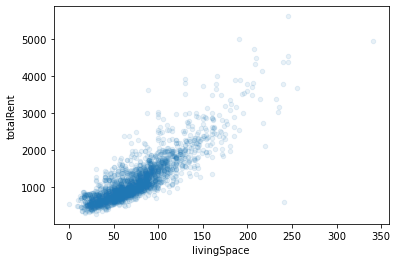

In [23]:
col2.plot(kind="scatter", x="livingSpace", y="totalRent",
 alpha=0.1)


<AxesSubplot:>

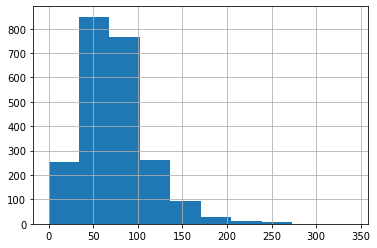

In [24]:
col2.livingSpace.hist()

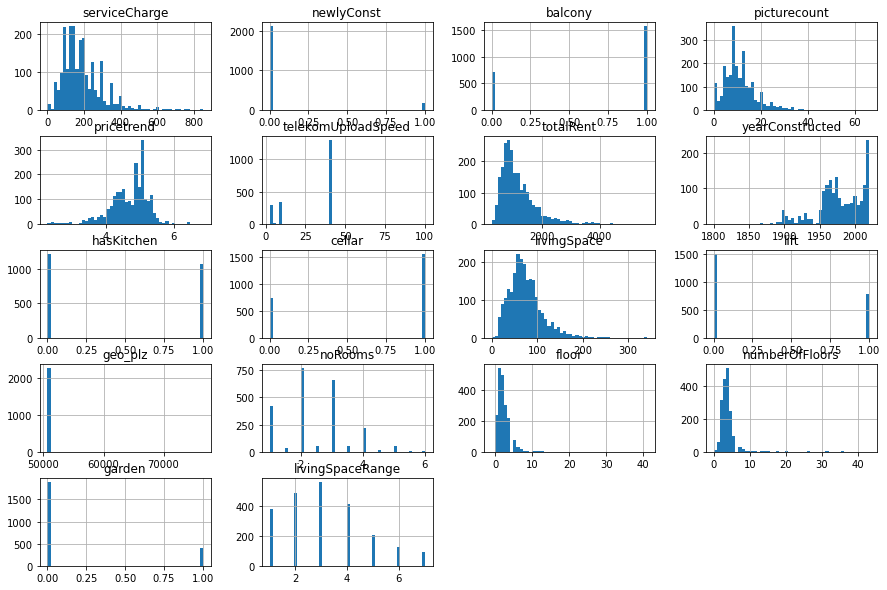

In [25]:
col2.hist(bins=50, figsize=(15,10))
plt.show()

## Splitting the data into Train_set and Test_set

In [26]:
#   Splitting the data with StratifiedShuffleSplit :

col2_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)
for train_index, test_index in col2_split.split(col2, col2["livingSpaceRange"]):
 strat_train_set = col2.iloc[train_index]
 strat_test_set = col2.iloc[test_index]




In [27]:
# lets see the living space category proportions in the train_set and  test_set:

strat_train_set["livingSpaceRange"].value_counts() / len(strat_train_set)

3    0.246568
2    0.215815
4    0.181219
1    0.168040
5    0.090610
6    0.056562
7    0.041186
Name: livingSpaceRange, dtype: float64

In [28]:
strat_test_set["livingSpaceRange"].value_counts() / len(strat_test_set)

3    0.245614
2    0.214912
4    0.182018
1    0.168860
5    0.089912
6    0.057018
7    0.041667
Name: livingSpaceRange, dtype: float64

In [29]:
# remove the rent_cat attribute from both the test and train set so the data is back to its original form :

for set_ in (strat_train_set, strat_test_set):
    set_.drop("livingSpaceRange", axis=1, inplace = True)




C:\ANACONDA\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
# Make a copy of the train set in a variable cologne :

cgn_rents = strat_train_set.copy()

In [31]:
#Let’s also separate the predictors and the labels, since we don’t necessarily want to
#apply the same transformations to the predictors and the target values (note that
#copy() creates a copy of the data and does not affect strat_train_set):
############################################################################################


y_train_cgn = cgn_rents["totalRent"].copy()
X_train_cgn = cgn_rents.drop("totalRent", axis=1)

y_test_cgn = strat_test_set["totalRent"].copy()
X_test_cgn = strat_test_set.drop("totalRent", axis=1)

## Correlations

In [32]:
corr_matrix = cgn_rents.corr()

In [33]:
# let’s look at how much each attribute correlates with the 'totalRent':

corr_matrix["totalRent"].sort_values(ascending=False)


totalRent             1.000000
livingSpace           0.845209
serviceCharge         0.782888
noRooms               0.643004
picturecount          0.342863
balcony               0.291785
lift                  0.214097
yearConstructed       0.138936
newlyConst            0.105950
hasKitchen            0.081562
floor                 0.065111
cellar                0.048304
garden                0.026230
numberOfFloors        0.015193
telekomUploadSpeed   -0.000431
geo_plz              -0.038652
pricetrend           -0.041544
Name: totalRent, dtype: float64

*There is a strong positive correlation between 'totalRent' and the attributes :  'livingSpace', 'serviceCharge'*

<AxesSubplot:>

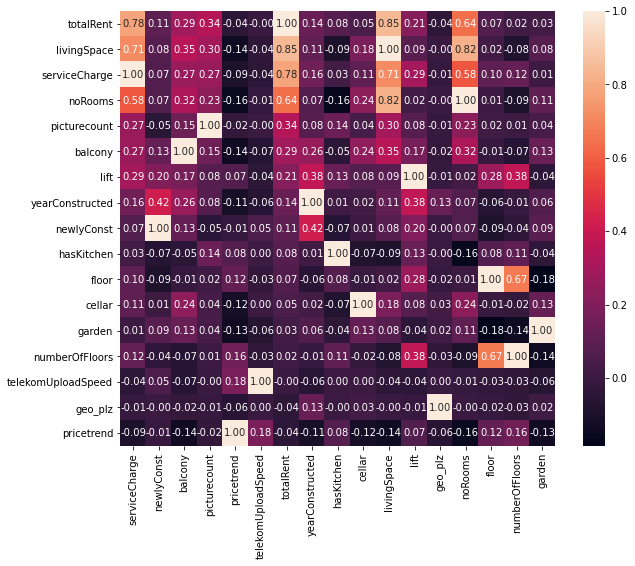

In [34]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cgn_rents.corr().sort_values(by='totalRent', ascending=False), square = True, fmt='.2f' , annot = True)

array([[<AxesSubplot:xlabel='totalRent', ylabel='totalRent'>,
        <AxesSubplot:xlabel='livingSpace', ylabel='totalRent'>,
        <AxesSubplot:xlabel='serviceCharge', ylabel='totalRent'>,
        <AxesSubplot:xlabel='noRooms', ylabel='totalRent'>],
       [<AxesSubplot:xlabel='totalRent', ylabel='livingSpace'>,
        <AxesSubplot:xlabel='livingSpace', ylabel='livingSpace'>,
        <AxesSubplot:xlabel='serviceCharge', ylabel='livingSpace'>,
        <AxesSubplot:xlabel='noRooms', ylabel='livingSpace'>],
       [<AxesSubplot:xlabel='totalRent', ylabel='serviceCharge'>,
        <AxesSubplot:xlabel='livingSpace', ylabel='serviceCharge'>,
        <AxesSubplot:xlabel='serviceCharge', ylabel='serviceCharge'>,
        <AxesSubplot:xlabel='noRooms', ylabel='serviceCharge'>],
       [<AxesSubplot:xlabel='totalRent', ylabel='noRooms'>,
        <AxesSubplot:xlabel='livingSpace', ylabel='noRooms'>,
        <AxesSubplot:xlabel='serviceCharge', ylabel='noRooms'>,
        <AxesSubplot:xlabel='no

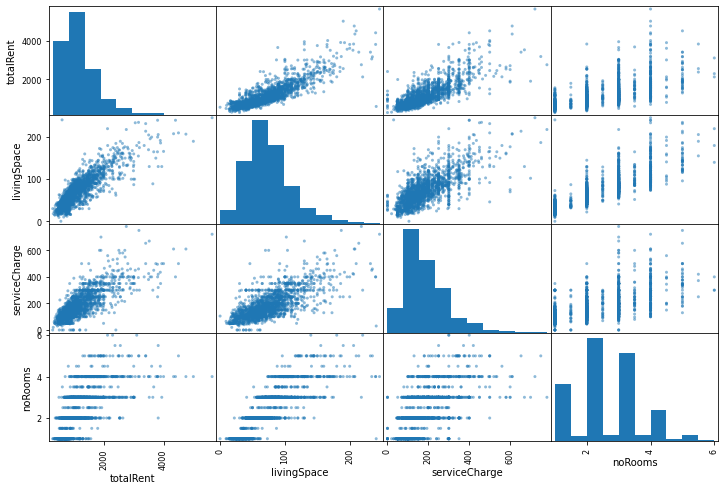

In [35]:
attributes = ["totalRent","livingSpace", "serviceCharge", "noRooms"]
scatter_matrix(cgn_rents[attributes], figsize=(12, 8))


*(The most promising attributes to predict the totalRent are 'livingSpace' and 'serviceCharge')*

# Building a preprocessing-pipeline

In [36]:
# Pipeline for numerical attributes

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [37]:
# Pipeline for text/categorical attributes

from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

In [38]:
# Merging both pipelines

from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_cgn.select_dtypes(include=np.number))
cat_attribs = list(X_train_cgn.select_dtypes(include=['object']))

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

Now we have a nice preprocessing pipeline that takes the raw data and outputs numerical input features that we can feed to any Machine Learning model we want.


In [39]:
X_train = preprocess_pipeline.fit_transform(X_train_cgn)
X_train.shape

(1821, 1917)

In [40]:
X_train

array([[ 0.07893286, -0.27841479,  0.69143649, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8479131 , -0.27841479, -1.44626443, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.63993658, -0.27841479, -1.44626443, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.61552789, -0.27841479,  0.69143649, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.46432367, -0.27841479, -1.44626443, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.20090429, -0.27841479,  0.69143649, ...,  0.        ,
         1.        ,  0.        ]])

In [41]:
y_train_cgn.isna().sum()/len(y_train_cgn)

0.0

In [42]:
y_train_cgn.shape

(1821,)

# Select, train and evaluate models

### Decision Tree Regression model

In [43]:
from sklearn.tree import DecisionTreeRegressor

DT_regressor = DecisionTreeRegressor(random_state = 0)
DT_regressor.fit(X_train, y_train_cgn)
y_pred_train = DT_regressor.predict(X_train)

In [44]:
(y_train_cgn - y_pred_train).abs().mean()

0.0

In [45]:
y_train_cgn.mean()

1190.3363426688627

In [46]:
# SDecision Tree prediction on the test data set

X_test_prep = preprocess_pipeline.transform(X_test_cgn[num_attribs + cat_attribs])
y_pred_test = DT_regressor.predict(X_test_prep)

C:\ANACONDA\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [47]:
(y_test_cgn - y_pred_test).abs().mean()

207.96078947368426

In [48]:
# R-squared metric evaluation

from sklearn.metrics import r2_score
r2_DeciReg = r2_score(y_test_cgn, y_pred_test)

In [49]:
# RMSE (Root Mean Square Error) evaluation
RMSE_DeciReg = np.sqrt(mean_squared_error(y_test_cgn, y_pred_test))

### Random Forest Regression model

In [50]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train_cgn)
y_pred_train = forest_reg.predict(X_train)

In [51]:
(y_train_cgn - y_pred_train).abs().mean()

55.17924673256462

In [52]:
y_train_cgn.mean()

1190.3363426688627

In [53]:
# Random Forest prediction on the test data set

X_test_prep = preprocess_pipeline.transform(X_test_cgn[num_attribs + cat_attribs])
y_pred_test = forest_reg.predict(X_test_prep)

C:\ANACONDA\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [54]:
(y_test_cgn - y_pred_test).abs().mean()

142.25620679824564

In [55]:
# R2 score metric evaluation

from sklearn.metrics import r2_score
r2_forest_reg = r2_score(y_test_cgn, y_pred_test)

In [56]:
# RMSE (Root Mean Square Error) evaluation
RMSE_forest_reg = np.sqrt(mean_squared_error(y_test_cgn, y_pred_test))

### SGD-Regression-model

In [57]:
from sklearn.linear_model import SGDRegressor

Sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)
Sgd_regressor.fit(X_train, y_train_cgn)
y_pred_train = Sgd_regressor.predict(X_train)

In [58]:
(y_train_cgn - y_pred_train).abs().mean()

137.9057319369086

In [59]:
# SGD prediction on the test data set

X_test_prep = preprocess_pipeline.transform(X_test_cgn[num_attribs + cat_attribs])
y_pred_test = Sgd_regressor.predict(X_test_prep)

C:\ANACONDA\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [60]:
(y_test_cgn - y_pred_test).abs().mean()

162.57926302908564

In [61]:
# R2 score metric evaluation

from sklearn.metrics import r2_score
r2_sgd = r2_score(y_test_cgn, y_pred_test)

In [62]:
# RMSE (Root Mean Square Error) evaluation

RMSE_sgd = np.sqrt(mean_squared_error(y_test_cgn, y_pred_test))

## Display feature importances

In [63]:
# !pip install eli5

In [64]:
import eli5

reg = Pipeline(steps=[('preprocessor', preprocess_pipeline),
                      ('regressor', forest_reg)])

onehot_columns = list(reg.named_steps['preprocessor'].named_transformers_['cat'].named_steps['cat_encoder'].get_feature_names(input_features=cat_attribs))
numeric_features_list = list(num_attribs)
numeric_features_list.extend(onehot_columns)

eli5.explain_weights(reg.named_steps['regressor'], top=15, feature_names=numeric_features_list, feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.7123 ± 0.1006,livingSpace
0.1125 ± 0.0949,serviceCharge
0.0431 ± 0.0216,geo_plz
0.0132 ± 0.0119,yearConstructed
0.0129 ± 0.0139,picturecount
0.0093 ± 0.0106,pricetrend
0.0058 ± 0.0083,floor
0.0052 ± 0.0059,numberOfFloors
0.0049 ± 0.0088,noRooms
0.0044 ± 0.0064,interiorQual_normal


# Metric table

In [65]:
table = {'Metrics':['RMSE','R2_Score'],
         'RandomForeseRegressor':[RMSE_forest_reg, r2_forest_reg],
         'DecisionTreeRegressor':[RMSE_DeciReg, r2_DeciReg],
         'SGD Regressor':[RMSE_sgd, r2_sgd]   
}


Metric_table = pd.DataFrame(table)
Metric_table.style.hide_index()

Metrics,RandomForeseRegressor,DecisionTreeRegressor,SGD Regressor
RMSE,215.888125,312.967590,219.193381
R2_Score,0.884440,0.757145,0.880875
